In [1]:
# Extract from https://github.com/StanfordVL/behavior/blob/main/behavior/benchmark/behavior_benchmark.py
import os
import numpy as np

from PIL import Image
from igibson.utils.utils import parse_config

from igibson import object_states
from igibson.utils.utils import restoreState

from igibson.action_primitives.fetch_robot_semantic_actions_env import FetchRobotSemanticActionEnv
from igibson.custom_utils import get_env_config, print_properties
from igibson.primitives_utils import get_names_of_visible_obj_inside, get_objects_inside, settle_physics 
import igibson.render_utils as render_utils

import warnings
warnings.filterwarnings("ignore")


 _   _____  _  _
(_) / ____|(_)| |
 _ | |  __  _ | |__   ___   ___   _ __
| || | |_ || || '_ \ / __| / _ \ | '_ \
| || |__| || || |_) |\__ \| (_) || | | |
|_| \_____||_||_.__/ |___/ \___/ |_| |_|



/miniconda/envs/igibson/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Env config
task = "cleaning_out_drawers"
scene_id =  "Benevolence_1_int"

# Init env
sim_env = FetchRobotSemanticActionEnv(task, scene_id, verbose=False)

Rendering settings is None - going with the default settings!


In [4]:
def print_symbolic_state(state):
    print("-"*76)
    print("Symbolic state: \n")
    for k in state:
        print(k, state[k])
    print("-"*76)

In [5]:
plan = [
    {'action':'go_to', 'params':{'obj_name':'cabinet.n.01_1'}},
    {'action':'open', 'params':{'obj_name':'cabinet.n.01_1'}}, # TODO: add better prompts for the outer loop + it's failing too often
    {'action':'grasp', 'params':{'obj_name':'bowl.n.01_1'}}, # TODO: make the grasp more realistic somehow 
    #{'action':'grasp', 'params':{'obj_name':'bowl.n.01_2'}},
    #{'action':'grasp', 'params':{'obj_name':'spoon.n.01_1'}},
    #{'action':'grasp', 'params':{'obj_name':'spoon.n.01_2'}},
    {'action':'go_to', 'params':{'obj_name':'sink.n.01_1'}},
    {'action':'place_on_top', 'params':{'trg_obj_name':'bowl.n.01_1', 'container_obj_name':'sink.n.01_1'}},
    ]

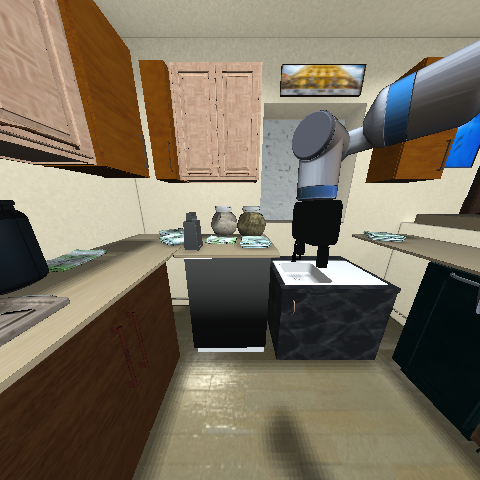

----------------------------------------------------------------------------
Symbolic state: 

is_near {'bowl.n.01_1': False, 'bowl.n.01_2': False, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': False}
is_visible {'bowl.n.01_1': False, 'bowl.n.01_2': False, 'cabinet.n.01_1': False, 'cabinet.n.01_2': True, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': True}
is_reachable {'bowl.n.01_1': False, 'bowl.n.01_2': False, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': False}
is_holding {'bowl.n.01_1': False, 'bowl.n.01_2': False, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': False}
is_movable {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'cabinet.n.01_1': False, 'cabi

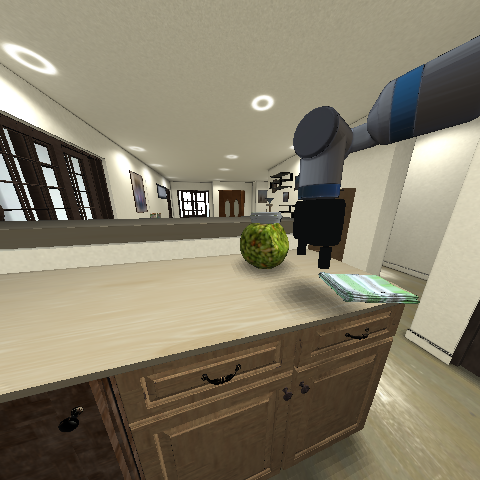

----------------------------------------------------------------------------
Symbolic state: 

is_near {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'cabinet.n.01_1': True, 'cabinet.n.01_2': False, 'spoon.n.01_1': True, 'spoon.n.01_2': True, 'piece_of_cloth.n.01_1': True, 'sink.n.01_1': False}
is_visible {'bowl.n.01_1': False, 'bowl.n.01_2': False, 'cabinet.n.01_1': True, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': False}
is_reachable {'bowl.n.01_1': False, 'bowl.n.01_2': False, 'cabinet.n.01_1': True, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': False}
is_holding {'bowl.n.01_1': False, 'bowl.n.01_2': False, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': False}
is_movable {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'cabinet.n.01_1': False, 'cabinet.n.

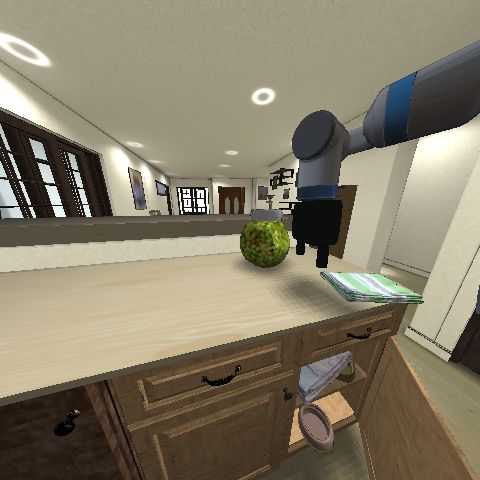

----------------------------------------------------------------------------
Symbolic state: 

is_near {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'cabinet.n.01_1': True, 'cabinet.n.01_2': False, 'spoon.n.01_1': True, 'spoon.n.01_2': True, 'piece_of_cloth.n.01_1': True, 'sink.n.01_1': False}
is_visible {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': True, 'sink.n.01_1': False}
is_reachable {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': True, 'sink.n.01_1': False}
is_holding {'bowl.n.01_1': False, 'bowl.n.01_2': False, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': False}
is_movable {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'cabinet.n.01_1': False, 'cabinet.n.01_2

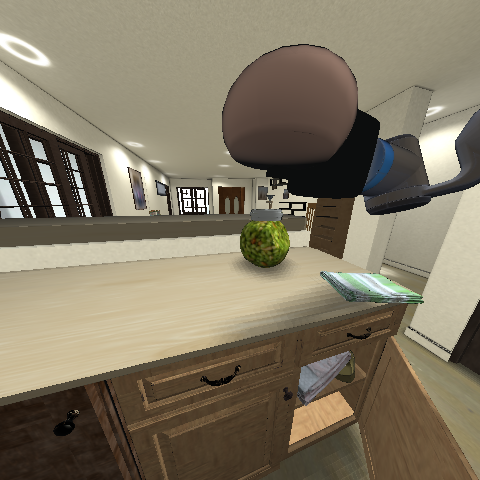

----------------------------------------------------------------------------
Symbolic state: 

is_near {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'cabinet.n.01_1': True, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': True, 'sink.n.01_1': False}
is_visible {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': True, 'sink.n.01_1': False}
is_reachable {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': True, 'sink.n.01_1': False}
is_holding {'bowl.n.01_1': True, 'bowl.n.01_2': False, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': False}
is_movable {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'cabinet.n.01_1': False, 'cabinet.n.01_

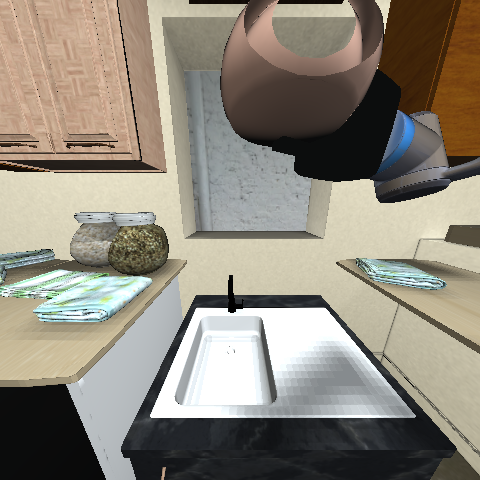

----------------------------------------------------------------------------
Symbolic state: 

is_near {'bowl.n.01_1': True, 'bowl.n.01_2': False, 'cabinet.n.01_1': False, 'cabinet.n.01_2': True, 'spoon.n.01_1': True, 'spoon.n.01_2': True, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': True}
is_visible {'bowl.n.01_1': True, 'bowl.n.01_2': False, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': True}
is_reachable {'bowl.n.01_1': True, 'bowl.n.01_2': False, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': True}
is_holding {'bowl.n.01_1': True, 'bowl.n.01_2': False, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': False}
is_movable {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'cabinet.n.01_1': False, 'cabinet.n.01

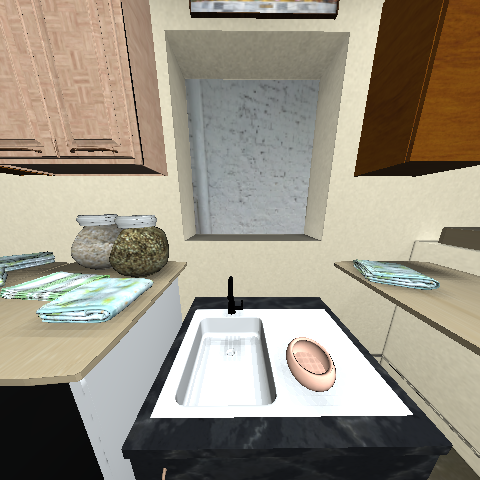

----------------------------------------------------------------------------
Symbolic state: 

is_near {'bowl.n.01_1': True, 'bowl.n.01_2': False, 'cabinet.n.01_1': False, 'cabinet.n.01_2': True, 'spoon.n.01_1': True, 'spoon.n.01_2': True, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': True}
is_visible {'bowl.n.01_1': True, 'bowl.n.01_2': False, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': True}
is_reachable {'bowl.n.01_1': True, 'bowl.n.01_2': False, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': True}
is_holding {'bowl.n.01_1': False, 'bowl.n.01_2': False, 'cabinet.n.01_1': False, 'cabinet.n.01_2': False, 'spoon.n.01_1': False, 'spoon.n.01_2': False, 'piece_of_cloth.n.01_1': False, 'sink.n.01_1': False}
is_movable {'bowl.n.01_1': True, 'bowl.n.01_2': True, 'cabinet.n.01_1': False, 'cabinet.n.0

In [6]:
image, symbolic_state = sim_env.get_state_and_image()

image.show()
print_symbolic_state(symbolic_state)

for action in plan:
    try:
        success, image, symbolic_state = sim_env.apply_action(action)
        print(f'Action {action} executed. Success: {success}')
        
        image.show()
        print_symbolic_state(symbolic_state)
        
        legal = True
        
    except ValueError as e:
        print(f"Action {action} failed: {e}")
        success = False
        legal = False